# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

> **Tip**: This data contain a lot of data related to rating and type of movie and the profit of each movie so we will analysis this data to help author to know what is the best for fans and help fans to know which is the best to watch.

### Question(s) for Analysis
>**Tip**: Which genres are most popular from year to year? 

> **Tip**: What kinds of properties are associated with movies that have high revenues?

> **Tip**: Highest and lowest rating  ?

> **Tip**: The Director of the best movie?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.shape

(10866, 21)

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


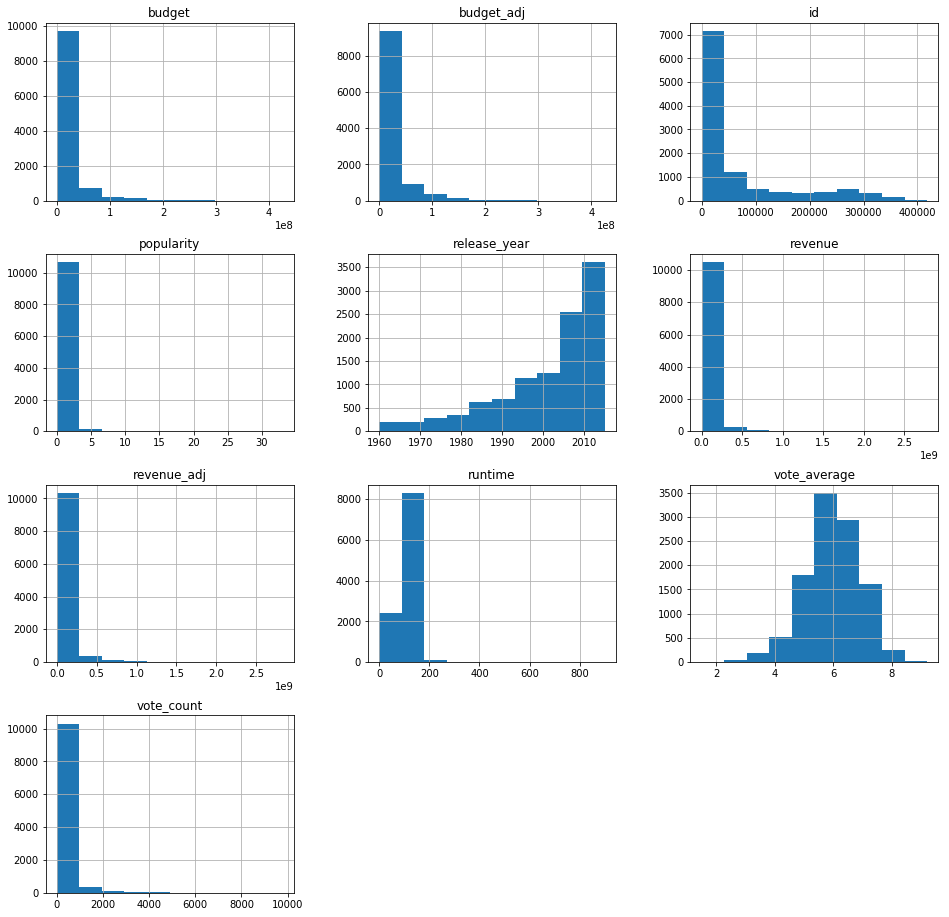

In [6]:
df.hist(figsize = (16,16));

In [7]:
#Check for nulls 
df.columns[df.isnull().any()]

Index(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords',
       'overview', 'genres', 'production_companies'],
      dtype='object')

In [8]:
#Check for duplicates  
sum(df.duplicated())

1


### Data Cleaning
> **Tip**: we will fill null with zeros

> **Tip**: remove duplicate 

> **Tip**: remove columns unwanted for my analysis (id, imdb_id, homepage, tagline, overview, keywords)


In [9]:
#  fill null with zeros
df.fillna(0,inplace = True)

#Check for nulls again
df.columns[df.isnull().any()]

Index([], dtype='object')

In [10]:
# remove duplicate
df.drop_duplicates(inplace = True)

In [11]:
df.drop(['id','imdb_id','homepage','tagline','overview','keywords'], axis = 'columns',inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1)  what genres are most popular from year to year? 

In [12]:
#first we need to check for first and last year in data
print(df['release_year'].min() , df['release_year'].max())
years = df['release_year'].unique()
#sort year list from low to high
years.sort()


1960 2015


In [13]:
# we need to split columns that contain | 
df['genres'] = df['genres'].str.split('|')
df['cast'] = df['cast'].str.split('|')
df['production_companies'] = df['production_companies'].str.split('|')

In [14]:
most_gen = []
name_gen = []
for year in years:
    df_genre = df[df['release_year']==year]
    ind = df_genre.index[df_genre['popularity'] == df_genre['popularity'].max()].tolist()
    most_gen.append(df.iloc[ind[0]]['genres'])
    name_gen.append(df.iloc[ind[0]]['original_title'])
    
final_gen_dict = {'Year': years,'Genres':most_gen, 'Movie_name':name_gen}
Q1=pd.DataFrame.from_dict(final_gen_dict)
Q1

,Year,Genres,Movie_name
0,1960,"[Action, Adventure, Western]",The Magnificent Seven
1,1961,"[Comedy, Drama, Romance]",Breakfast at Tiffany's
2,1962,"[Adventure, Drama, History, War]",Lawrence of Arabia
3,1963,"[Animation, Family]",The Sword in the Stone
4,1964,"[Drama, Comedy, War]",Dr. Strangelove or: How I Learned to Stop Worr...
5,1965,"[Drama, Family, Music, Romance]",The Sound of Music
6,1966,"[Drama, Science Fiction]",Fahrenheit 451
7,1967,"[Comedy, Drama, Romance]",The Graduate
8,1968,"[Adventure, Science Fiction, Mystery]",Planet of the Apes
9,1969,"[History, Drama, Western, Crime]",Butch Cassidy and the Sundance Kid


In [36]:
df[df['director']=='Christopher Nolan']

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
629,24.949134,165000000,621752480,Interstellar,"[Matthew McConaughey, Jessica Chastain, Anne H...",Christopher Nolan,169,"[Adventure, Drama, Science Fiction]","[Paramount Pictures, Legendary Pictures, Warne...",11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08,4.207106e+08
1919,9.363643,160000000,825500000,Inception,"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elle...",Christopher Nolan,148,"[Action, Thriller, Science Fiction, Mystery, A...","[Legendary Pictures, Warner Bros., Syncopy]",7/14/10,9767,7.9,2010,1.600000e+08,8.255000e+08,6.655000e+08
2875,8.466668,185000000,1001921825,The Dark Knight,"[Christian Bale, Michael Caine, Heath Ledger, ...",Christopher Nolan,152,"[Drama, Action, Crime, Thriller]","[DC Comics, Legendary Pictures, Warner Bros., ...",7/16/08,8432,8.1,2008,1.873655e+08,1.014733e+09,8.273675e+08
3955,1.111488,46000000,113714830,Insomnia,"[Al Pacino, Robin Williams, Maura Tierney, Hil...",Christopher Nolan,118,"[Crime, Mystery, Thriller]","[Section Eight, Alcon Entertainment, Witt/Thom...",5/24/02,564,6.6,2002,5.576402e+07,1.378521e+08,8.208807e+07
4363,6.591277,250000000,1081041287,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan,165,"[Action, Crime, Drama, Thriller]","[Legendary Pictures, Warner Bros., DC Entertai...",7/16/12,6723,7.5,2012,2.374361e+08,1.026713e+09,7.892767e+08
5399,0.168542,0,0,Doodlebug,[Jeremy Theobald],Christopher Nolan,3,"[Fantasy, Mystery]",NaN,1/1/97,47,6.5,1997,0.000000e+00,0.000000e+00,0.000000e+00
6191,5.400826,150000000,374218673,Batman Begins,"[Christian Bale, Michael Caine, Liam Neeson, K...",Christopher Nolan,140,"[Action, Crime, Drama]","[DC Comics, Legendary Pictures, Warner Bros., ...",6/14/05,4914,7.3,2005,1.674845e+08,4.178388e+08,2.503543e+08
6565,2.582095,40000000,109676311,The Prestige,"[Hugh Jackman, Christian Bale, Michael Caine, ...",Christopher Nolan,130,"[Drama, Mystery, Thriller]","[Touchstone Pictures, Syncopy]",10/19/06,2519,7.8,2006,4.326677e+07,1.186335e+08,7.536672e+07
8662,3.095625,9000000,39723096,Memento,"[Guy Pearce, Carrie-Anne Moss, Joe Pantoliano,...",Christopher Nolan,113,"[Mystery, Thriller]","[Summit Entertainment, Newmarket Capital Group...",10/11/00,2144,7.9,2000,1.139663e+07,5.030104e+07,3.890441e+07
9129,0.225908,0,0,Following,"[Alex Haw, Lucy Russell, John Nolan, Dick Brad...",Christopher Nolan,69,"[Crime, Drama, Thriller]","[Syncopy, Next Wave Films]",9/12/98,151,7.1,1998,0.000000e+00,0.000000e+00,0.000000e+00


### Question 2) What kinds of properties are associated with movies that have high revenues? 

In [15]:
#check for highe revenue 
df['revenue'].describe()

count    1.086500e+04
mean     3.982690e+07
std      1.170083e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.400000e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [16]:
# from previous analysis we find that high revenues start from 3.37e+07 *75%*
df_rev = df[df['revenue'] >=2.400000e+07]

In [17]:
df_rev = df_rev.sort_values(by=['revenue'])
print("The Highest Three revenues Movies statistics:")
df_rev.tail(3)

The Highest Three revenues Movies statistics:


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
5231,4.355219,200000000,1845034188,Titanic,"[Kate Winslet, Leonardo DiCaprio, Frances Fish...",James Cameron,194,"[Drama, Romance, Thriller]","[Paramount Pictures, Twentieth Century Fox Fil...",11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
1386,9.432768,237000000,2781505847,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,162,"[Action, Adventure, Fantasy, Science Fiction]","[Ingenious Film Partners, Twentieth Century Fo...",12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09


### Question 3) Highest and lowest rating Movie and director who made them..?

In [23]:
df_rate = df.sort_values(by=['vote_average'])
r,c = df_rate.shape
r-=1
print("The Hieghest rate movie is:",df_rate.iloc[r]['original_title'] , "Directed By:", df_rate.iloc[r]['director'] , '\n') 

print("The Lowest rate movie is:",df_rate.iloc[0]['original_title'] , "Directed By:", df_rate.iloc[0]['director']) 

The Hieghest rate movie is: The Story of Film: An Odyssey Directed By: Mark Cousins 

The Lowest rate movie is: Manos: The Hands of Fate Directed By: Harold P. Warren


<a id='conclusions'></a>
## Conclusions

> **Tip**:in this proect i answerd the questions that i recommanded but i feel that not the best question and not enough analysis for that dataset so i did my best and i need a feedback to evolve my code and my skills


In [20]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0